In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Hiragino Sans"

import numpy as np
import pandas as pd
import seaborn.objects as so

import pymc as pm
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 問題設定
常に確率が一定で、前回の結果が次回に一切影響影響しないくじ引きがあります。ある人がこのくじ引きを5回引いたところ、結果は「当たり、はずれ、はずれ、当たり、はずれ」でした。1回のくじ引きに当たる確率を$p$とするとき、この$p$の値を求めなさい。

# ベイズ推論（確率モデル定義）

In [2]:
# データ（観測値）準備
X = np.array([1, 0, 0, 1, 0])
print(X)

[1 0 0 1 0]


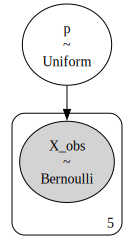

In [3]:
with pm.Model() as model1:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Bernoulli("X_obs", p=p, observed=X)

g = pm.model_to_graphviz(model1)
display(g)

# ベイズ推論（サンプリング）

In [4]:
with model1:
    idata1_1 = pm.sample(chains=3, tune=2000, draws=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [p]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [5]:
with model1:
    idata1_2 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


# ベイズ推論（結果分析）

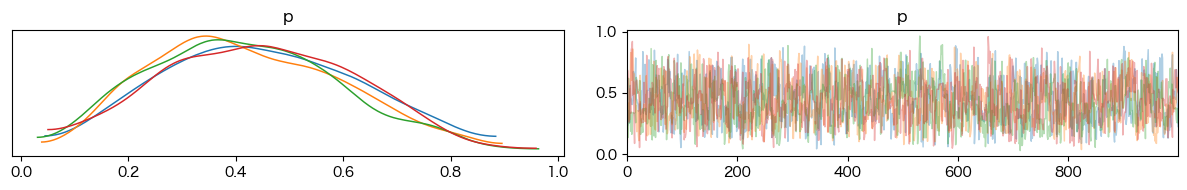

In [6]:
az.plot_trace(idata1_2, compact=False)
plt.tight_layout();

Text(0.5, 1.0, 'ベイズ推論結果\u3000初期版')

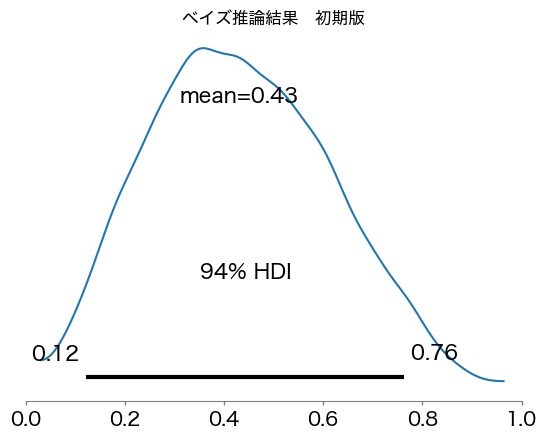

In [7]:
ax = az.plot_posterior(idata1_2)
ax.set_xlim(0, 1)
ax.set_title("ベイズ推論結果　初期版")

In [8]:
summary1_2 = az.summary(idata1_2)
display(summary1_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.432,0.177,0.123,0.764,0.004,0.003,1662.0,2567.0,1.0


# ベイズ推論（二項分布バージョン）

In [9]:
with pm.Model() as model2:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Binomial("X_obs", p=p, n=X.shape[0], observed=X.sum())

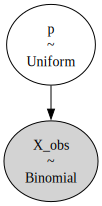

In [10]:
g = pm.model_to_graphviz(model2)
display(g)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Text(0.5, 1.0, 'ベイズ推定\u3000二項分布版')

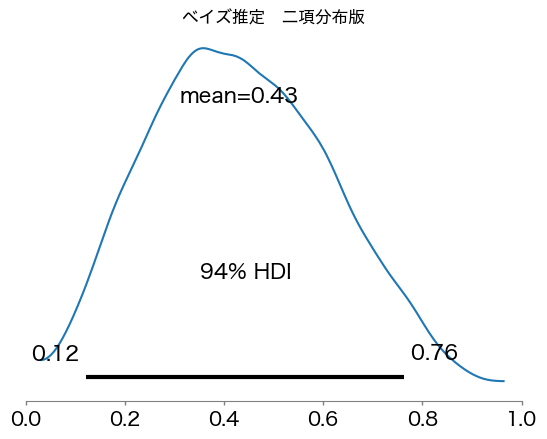

In [11]:
with model2:
    idata2 = pm.sample(random_seed=42)

ax = az.plot_posterior(idata2)
ax.set_xlim(0, 1)
ax.set_title("ベイズ推定　二項分布版")

In [12]:
summary2 = az.summary(idata2)
display(summary2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.432,0.177,0.123,0.764,0.004,0.003,1662.0,2567.0,1.0


# ベイズ推論（試行回数を増やす）

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Text(0.5, 1.0, '試行回数を増やす(n=50)')

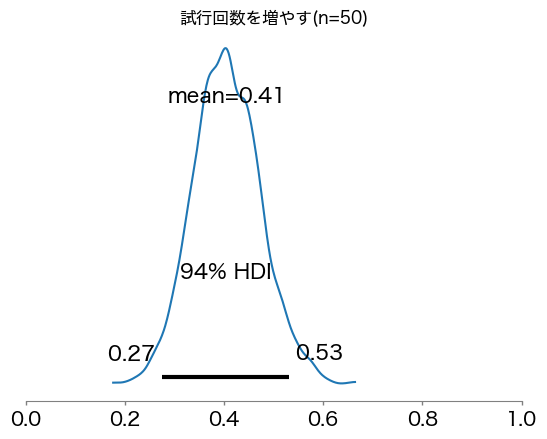

In [13]:
with pm.Model() as model3:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Binomial("X_obs",p=p, n=X.shape[0] * 10, observed=X.sum() * 10)

with model3:
    idata3 = pm.sample(random_seed=42)

ax = az.plot_posterior(idata3)
ax.set_xlim(0, 1)
ax.set_title("試行回数を増やす(n=50)")

In [14]:
summary3 = az.summary(idata3)
display(summary3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.406,0.068,0.275,0.531,0.002,0.001,1828.0,2909.0,1.0


# ベイズ推論（事前分布の変更）

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Text(0.5, 1.0, '事前分布変更版 [0.1, 0.9]')

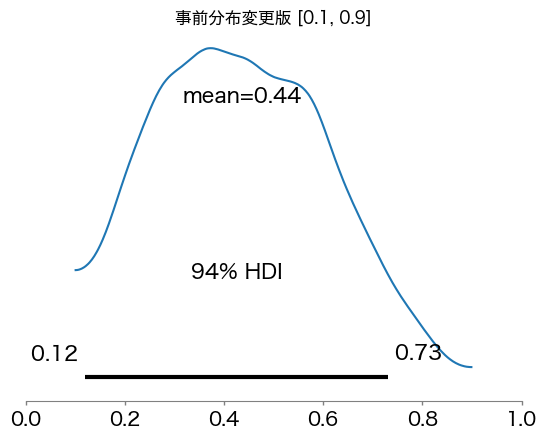

In [15]:
with pm.Model() as model4:
    p = pm.Uniform("p", lower=0.1, upper=0.9)
    X_obs = pm.Binomial("X_obs", p=p, n=X.shape[0], observed=X.sum())
    idata4 = pm.sample(random_seed=42)

ax = az.plot_posterior(idata4)
ax.set_xlim(0, 1)
ax.set_title("事前分布変更版 [0.1, 0.9]")

In [16]:
summary4 = az.summary(idata4)
display(summary4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.436,0.171,0.12,0.73,0.005,0.003,1331.0,1352.0,1.0


# ベータ分布で直接確率分布を求める

(0.0, 1.0)

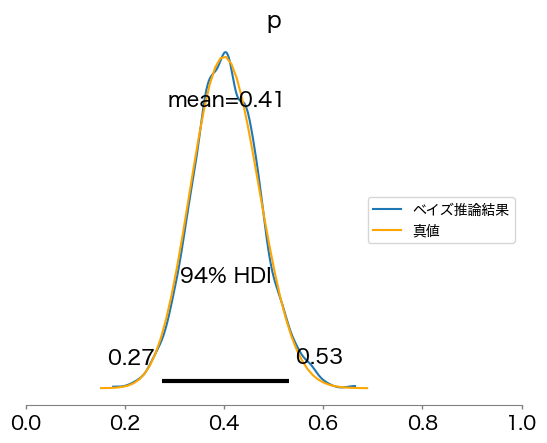

In [17]:
from scipy import stats
alpha = 20 + 1
beta = 30 + 1
true_beta = stats.beta(alpha, beta)

ax = az.plot_posterior(idata3)
ax.lines[0].set_label("ベイズ推論結果")

x = np.linspace(*ax.get_xlim())
ax.plot(x, true_beta.pdf(x), color="orange", label="真値")
ax.legend(loc="center right")
ax.set_xlim(0, 1)